In [ ]:
!pip install transformers torch pillow


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel
from PIL import Image
import torch

# Define the model and processor
model_name = "ahmed-masry/unichart-base-960"
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = DonutProcessor.from_pretrained(model_name)




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.94k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/186 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/420 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/510 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.01M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/355 [00:00<?, ?B/s]

In [ ]:
import requests

In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

In [ ]:

model_name = "khhuang/chart-to-table"
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = DonutProcessor.from_pretrained(model_name)

image_url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/20294671002019.png"

# Fetch and load the image
response = requests.get(image_url, stream=True)
image = Image.open(response.raw).convert("RGB")

# Define the input prompt for the task
input_prompt = "<data_table_generation> <s_answer>"

# Encode the chart figure and tokenize the text
pixel_values = processor(image, random_padding=False, return_tensors="pt").pixel_values
decoder_input_ids = processor.tokenizer(input_prompt, add_special_tokens=False, return_tensors="pt", max_length=510).input_ids

# Generate the output
outputs = model.generate(
    pixel_values,
    decoder_input_ids=decoder_input_ids,
    max_length=model.decoder.config.max_position_embeddings,
    early_stopping=True,
    pad_token_id=processor.tokenizer.pad_token_id,
    eos_token_id=processor.tokenizer.eos_token_id,
    use_cache=True,
    num_beams=4,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
    return_dict_in_generate=True,
)

# Decode and print the output
sequence = processor.batch_decode(outputs.sequences)[0]
sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
extracted_table = sequence.split("<s_answer>")[1].strip()

print(extracted_table)


config.json:   0%|          | 0.00/4.97k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/809M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/439 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/510 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.01M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/355 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


TITLE | Death rate from neonatal preterm birth complication, 2004 &&& Country | Death rate from neonatal preterm birth complication, 2004 &&& Laos | 396 &&& Comoros | 180 &&& Nicaragua | 68 &&& Australia | 18 &&& Belgium | 14


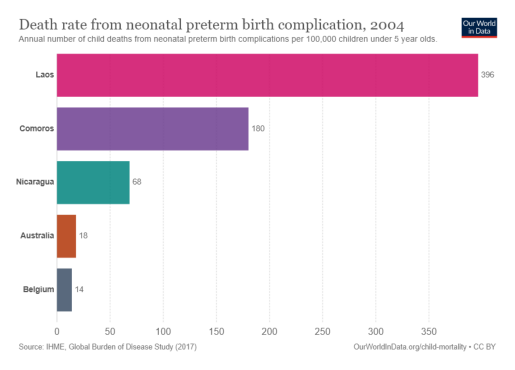

In [ ]:
import requests
from PIL import Image
import matplotlib.pyplot as plt

# URL of the image
url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/20294671002019.png"

# Fetch the image from the URL
response = requests.get(url, stream=True)
image = Image.open(response.raw)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
!pip install opencv-python-headless numpy matplotlib


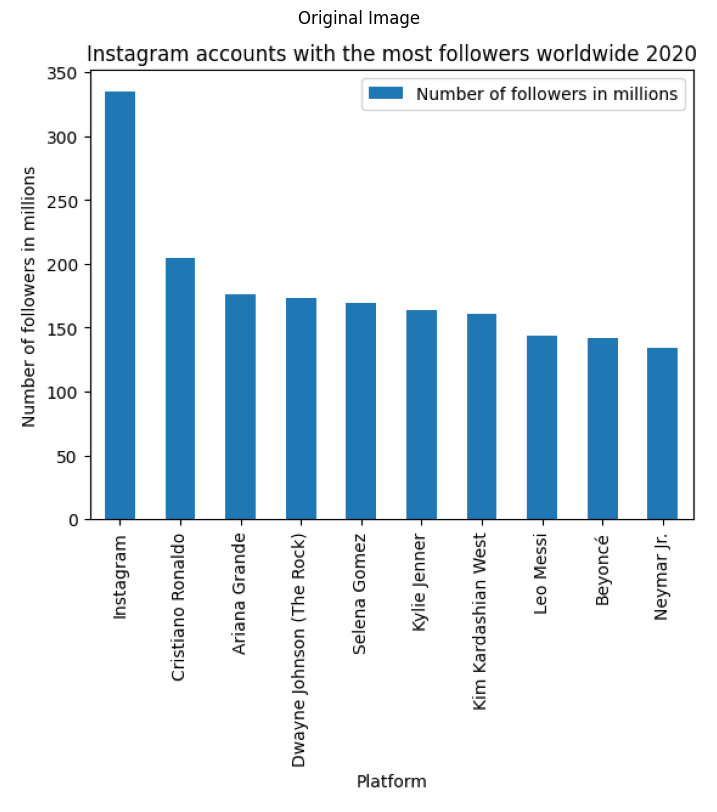

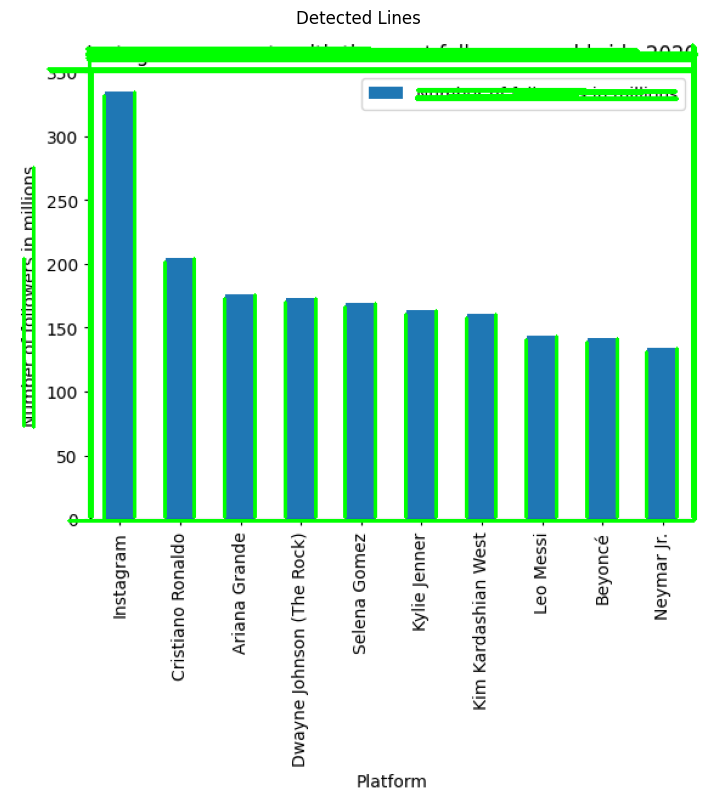

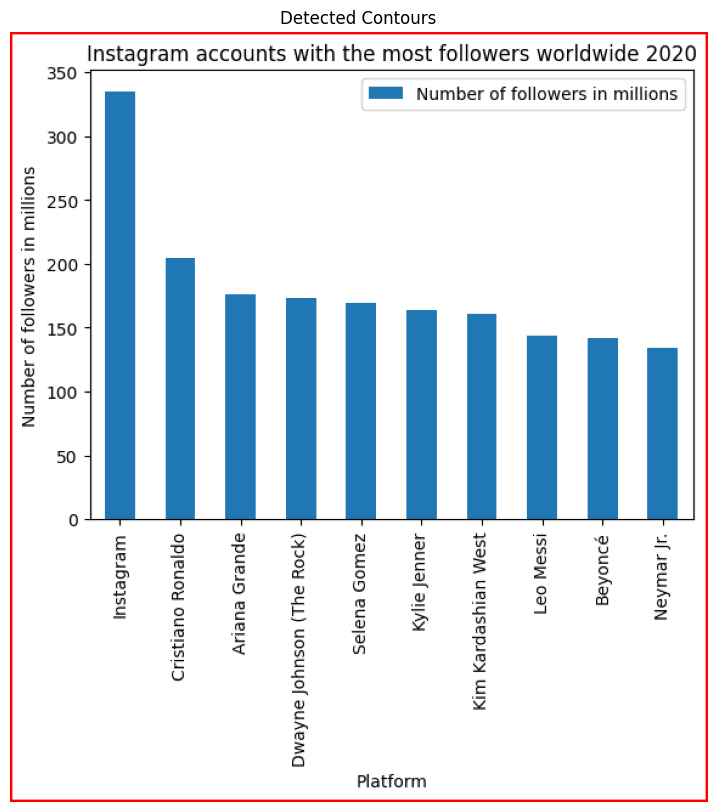

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    return image, gray, blurred

def detect_lines(image):
    # Use Canny edge detection
    edges = cv2.Canny(image, 50, 150, apertureSize=3)

    # Detect lines using Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

    return lines

def draw_lines(image, lines):
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

def detect_contours(image):
    # Find contours
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def draw_contours(image, contours):
    # Draw contours on the image
    cv2.drawContours(image, contours, -1, (0, 0, 255), 2)
    return image

def display_image(image, title="Image"):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Path to your chart image
image_path = '/content/2.png'
# Preprocess the image
original_image, gray_image, preprocessed_image = preprocess_image(image_path)

# Detect lines in the image
lines = detect_lines(preprocessed_image)

# Draw detected lines on the original image
image_with_lines = draw_lines(original_image.copy(), lines)

# Detect contours in the preprocessed image
contours = detect_contours(preprocessed_image)

# Draw contours on the original image
image_with_contours = draw_contours(original_image.copy(), contours)

# Display the results
display_image(original_image, title="Original Image")
display_image(image_with_lines, title="Detected Lines")
display_image(image_with_contours, title="Detected Contours")


In [ ]:
pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 16.8 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

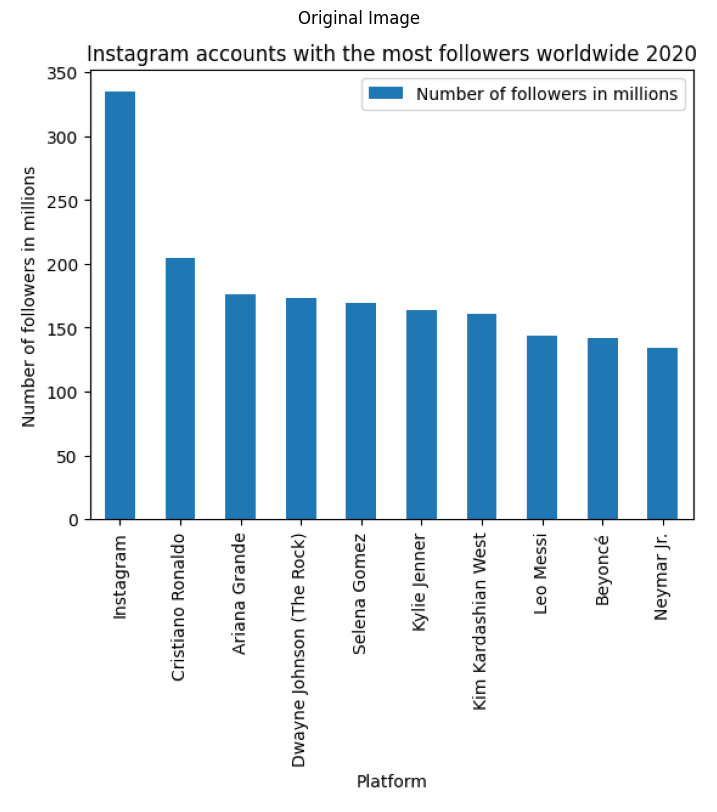

Extracted Texts:
Text: Instagram accounts with the most followers worldwide 2020
Bounding Box: [[59, 4], [568, 4], [568, 31], [59, 31]]

Text: 350
Bounding Box: [[29, 27], [57, 27], [57, 43], [29, 43]]

Text: Number of followers in millions
Bounding Box: [[333, 43], [551, 43], [551, 59], [333, 59]]

Text: 300
Bounding Box: [[29, 81], [57, 81], [57, 95], [29, 95]]

Text: [
Bounding Box: [[9, 111], [23, 111], [23, 167], [9, 167]]

Text: 250
Bounding Box: [[27, 131], [59, 131], [59, 149], [27, 149]]

Text: 200
Bounding Box: [[29, 185], [59, 185], [59, 201], [29, 201]]

Text: 1
Bounding Box: [[7, 197], [23, 197], [23, 251], [7, 251]]

Text: 150
Bounding Box: [[29, 237], [57, 237], [57, 253], [29, 253]]

Text: 
Bounding Box: [[9, 267], [23, 267], [23, 329], [9, 329]]

Text: 100
Bounding Box: [[31, 289], [57, 289], [57, 305], [31, 305]]

Text: 1
Bounding Box: [[85, 413], [101, 413], [101, 487], [85, 487]]

Text: 1
Bounding Box: [[131, 413], [147, 413], [147, 471], [131, 471]]

Text: 8
Boundi

In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    return image, gray, blurred

def detect_text_easyocr(image_path):
    reader = easyocr.Reader(['en'])
    result = reader.readtext(image_path)

    extracted_texts = [(text[1], text[0]) for text in result]

    return extracted_texts

def display_image(image, title="Image"):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Path to your chart image
image_path = '/content/2.png'

# Preprocess the image
original_image, gray_image, preprocessed_image = preprocess_image(image_path)

# Detect text in the image using EasyOCR
extracted_texts = detect_text_easyocr(image_path)

# Display the results
display_image(original_image, title="Original Image")

print("Extracted Texts:")
for text, bbox in extracted_texts:
    print(f"Text: {text}\nBounding Box: {bbox}\n")


In [ ]:
def organize_texts(texts):
    # Sort texts based on y-coordinates
    texts_sorted = sorted(texts, key=lambda x: x[1][0][1])

    organized_text = []
    for text in texts_sorted:
        organized_text.append(text[0])

    return '\n'.join(organized_text)

# Extracted texts from the image
extracted_texts = detect_text_easyocr(image_path)

# Organize and display the text
organized_text = organize_texts(extracted_texts)
print("Organized Text:")
print(organized_text)


Organized Text:
Instagram accounts with the most followers worldwide 2020
350
Number of followers in millions
300
[
250
200
1
150

100
16
8
8
[
2
1
1
1
2
J
2
2
1
1
8
[
0
1
Platform


In [ ]:
def extract_text_from_bars(image, texts):
    bars_text = []
    for text, bbox in texts:
        x, y, w, h = cv2.boundingRect(np.array(bbox))
        bar_text = {
            'text': text,
            'bounding_box': (x, y, w, h)
        }
        bars_text.append(bar_text)

    # Sort bars based on x-coordinate if necessary
    bars_text_sorted = sorted(bars_text, key=lambda b: b['bounding_box'][0])

    return bars_text_sorted

# Extract text and process for bars
bars_text = extract_text_from_bars(original_image, extracted_texts)

print("Bars Texts:")
for bar in bars_text:
    print(f"Text: {bar['text']}\nBounding Box: {bar['bounding_box']}\n")


Bars Texts:
Text: 1
Bounding Box: (7, 197, 17, 55)

Text: [
Bounding Box: (9, 111, 15, 57)

Text: 
Bounding Box: (9, 267, 15, 63)

Text: 250
Bounding Box: (27, 131, 33, 19)

Text: 350
Bounding Box: (29, 27, 29, 17)

Text: 300
Bounding Box: (29, 81, 29, 15)

Text: 200
Bounding Box: (29, 185, 31, 17)

Text: 150
Bounding Box: (29, 237, 29, 17)

Text: 100
Bounding Box: (31, 289, 27, 17)

Text: Instagram accounts with the most followers worldwide 2020
Bounding Box: (59, 4, 510, 28)

Text: 1
Bounding Box: (85, 413, 17, 75)

Text: 1
Bounding Box: (131, 413, 17, 59)

Text: 8
Bounding Box: (131, 471, 17, 67)

Text: 8
Bounding Box: (181, 411, 17, 55)

Text: 1
Bounding Box: (181, 467, 17, 49)

Text: 2
Bounding Box: (229, 413, 17, 41)

Text: 2
Bounding Box: (231, 455, 15, 35)

Text: [
Bounding Box: (231, 489, 17, 61)

Text: 1
Bounding Box: (231, 549, 17, 59)

Text: 8
Bounding Box: (281, 411, 15, 53)

Text: 1
Bounding Box: (281, 465, 15, 51)

Text: Platform
Bounding Box: (285, 609, 61, 17)

Text: 2

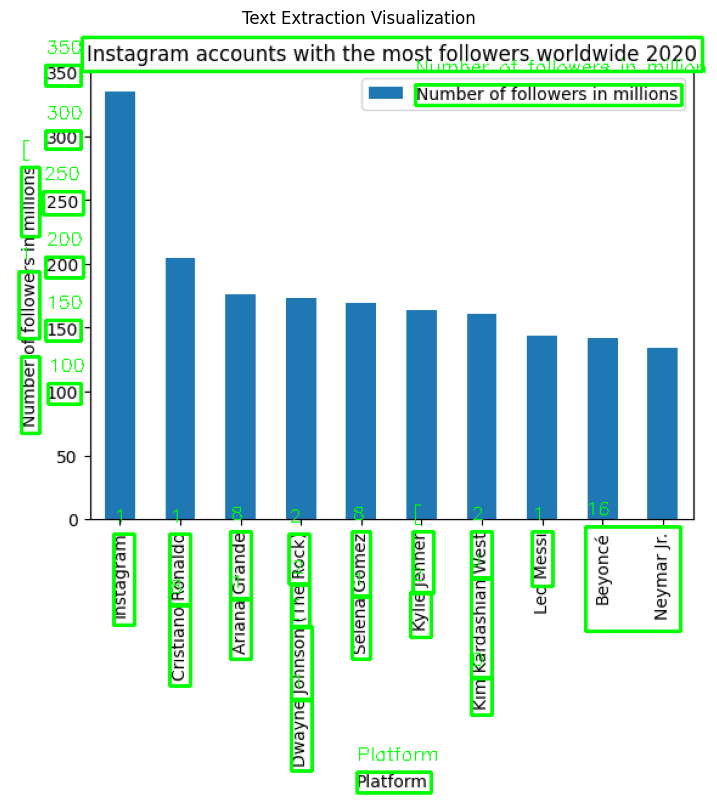

In [ ]:
def draw_text_bboxes(image, texts):
    for text, bbox in texts:
        x, y, w, h = cv2.boundingRect(np.array(bbox))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    return image

# Draw bounding boxes and text on the original image
image_with_texts = draw_text_bboxes(original_image.copy(), extracted_texts)
display_image(image_with_texts, title="Text Extraction Visualization")


In [ ]:
pip install transformers torch torchvision


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model_name = 'gpt2'  # You can replace this with another model if needed
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

def generate_meaningful_text(prompt):
    # Tokenize the input prompt
    inputs = tokenizer.encode(prompt, return_tensors='pt')

    # Generate text
    outputs = model.generate(inputs, max_length=150, num_return_sequences=1)

    # Decode the generated text
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return generated_text

# Example prompt based on your chart or graph
prompt = "Generate a meaningful summary for the following chart data: Instagram accounts with the most followers worldwide 2020."

# Generate text
generated_text = generate_meaningful_text(prompt)

print("Generated Text:")
print(generated_text)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Text:
Generate a meaningful summary for the following chart data: Instagram accounts with the most followers worldwide 2020.

The following chart shows the average number of followers for each Instagram account in the world.

The following chart shows the average number of followers for each Instagram account in the world.

The following chart shows the average number of followers for each Instagram account in the world.

The following chart shows the average number of followers for each Instagram account in the world.

The following chart shows the average number of followers for each Instagram account in the world.

The following chart shows the average number of followers for each Instagram account in the world.

The following chart shows the average number of followers for each Instagram account in


In [ ]:
pip install transformers torch


In [ ]:
from transformers import pipeline

def generate_summary(extracted_texts):
    # Create a summarization pipeline
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn", tokenizer="facebook/bart-large-cnn")

    # Prepare the text for summarization
    # Join all extracted texts into a single string, with line breaks or spaces
    text_to_summarize = "\n".join([text for text, _ in extracted_texts])

    # Generate the summary
    summary = summarizer(text_to_summarize, max_length=200, min_length=50, do_sample=False)

    return summary[0]['summary_text']

# Example extracted texts from chart (replace with your actual data)
extracted_texts = [
    ("Instagram accounts with the most followers worldwide 2020", (59, 4, 510, 28)),
    ("350", (29, 27, 29, 17)),
    ("300", (29, 81, 29, 15)),
    ("200", (29, 185, 31, 17)),
    ("150", (29, 237, 29, 17)),
    ("100", (31, 289, 27, 17)),
    ("1", (85, 413, 17, 75)),
    ("8", (131, 471, 17, 67)),
    ("Platform", (285, 609, 61, 17)),
    ("Number of followers in millions", (333, 43, 219, 17))
]

# Generate and print the summary
summary = generate_summary(extracted_texts)
print("Summary of the Chart:")
print(summary)


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Your max_length is set to 200, but your input_length is only 32. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=16)


Summary of the Chart:
Instagram accounts with the most followers worldwide 2020 worrisome350350300300300200 200 200 200 150 150 150 100 100 100 1                8                 Platform                Number of followers in millions. Instagram accounts with most followers in the world. 2020                350350 300300200200 150 200 150 100 150 100. Platform                 number of followers  in million.


In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.4/360.4 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
pip install --upgrade openai


In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration
import torch

# Initialize the tokenizer and model
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")

def generate_summary(texts):
    # Combine all text into a single string
    combined_text = " ".join(texts)

    # Tokenize and encode the input text
    inputs = tokenizer(combined_text, return_tensors="pt", max_length=1024, truncation=True)

    # Generate summary
    with torch.no_grad():
        summary_ids = model.generate(inputs["input_ids"], max_length=150, num_beams=4, length_penalty=2.0, early_stopping=True)

    # Decode and return the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def extract_text_from_bars(texts):
    bars_text = [text for text in texts]
    return bars_text

# Sample extracted texts
extracted_texts = [
    "Instagram accounts with the most followers worldwide 2020",
    "350", "300", "200", "150", "100",
    "1", "8", "Platform", "Number of followers in millions"
]

# Extract and summarize text
bars_text = extract_text_from_bars(extracted_texts)
summary = generate_summary(bars_text)

print("Generated Summary:")
print(summary)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

Generated Summary:
Instagram accounts with the most followers worldwide 2020 350 300 200 150 100 1 8 Platform Number of followers in millions


In [ ]:
import easyocr

def extract_text_with_easyocr(image_path):
    reader = easyocr.Reader(['en'])  # Specify language
    results = reader.readtext(image_path)

    text = [result[1] for result in results]  # Extract text from results
    return text

# Example usage
texts = extract_text_with_easyocr('/content/2.png')
print(texts)



['Instagram accounts with the most followers worldwide 2020', '350', 'Number of followers in millions', '300', '[', '250', '200', '1', '150', '', '100', '1', '1', '8', '2', '8', '[', '2', '1', '16', '8', '1', '2', '1', '2', 'J', '[', '0', '1', 'Platform']


In [ ]:
import re

def organize_extracted_text(text):
    title = re.search(r'Title:\s*(.*)', text)
    x_axis = re.findall(r'X_Axis\[(.*?)\]', text)
    y_axis = re.findall(r'Y_Axis\[(.*?)\]', text)

    title = title.group(1) if title else None
    x_axis = x_axis[0].split(', ') if x_axis else []
    y_axis = y_axis[0].split(', ') if y_axis else []

    return {
        'Title': title,
        'X_Axis': x_axis,
        'Y_Axis': y_axis
    }

# Example usage
organized_data = organize_extracted_text(text)
print(organized_data)


{'Title': None, 'X_Axis': [], 'Y_Axis': []}


In [ ]:
import easyocr
import re
from transformers import BartTokenizer, BartForConditionalGeneration
import torch

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # Specify language

def extract_text_with_easyocr(image_path):
    results = reader.readtext(image_path)
    text = [result[1] for result in results]  # Extract text from results
    return text

def organize_extracted_text(text_list):
    # Combine all extracted text into a single string
    combined_text = " ".join(text_list)

    # Extract organized data
    title = re.search(r'Title:\s*(.*)', combined_text)
    x_axis = re.findall(r'X_Axis\[(.*?)\]', combined_text)
    y_axis = re.findall(r'Y_Axis\[(.*?)\]', combined_text)

    title = title.group(1) if title else None
    x_axis = x_axis[0].split(', ') if x_axis else []
    y_axis = y_axis[0].split(', ') if y_axis else []

    return {
        'Title': title,
        'X_Axis': x_axis,
        'Y_Axis': y_axis
    }

# Initialize BART tokenizer and model
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")

def generate_summary(data):
    # Convert organized data to a string
    text = f"Title: {data['Title']}\n"
    text += f"X Axis: {', '.join(data['X_Axis'])}\n"
    text += f"Y Axis: {', '.join(data['Y_Axis'])}"

    # Tokenize and encode the input text
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True)

    # Generate summary
    with torch.no_grad():
        summary_ids = model.generate(inputs["input_ids"], max_length=150, num_beams=4, length_penalty=2.0, early_stopping=True)

    # Decode and return the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def process_chart_image(image_path):
    # Extract text from image
    text_list = extract_text_with_easyocr(image_path)

    # Organize the extracted text
    organized_data = organize_extracted_text(text_list)

    # Generate summary
    summary = generate_summary(organized_data)

    print("Generated Summary:")
    print(summary)

# Replace with the path to your chart image
process_chart_image('/content/2.png')


Generated Summary:
Title: NoneX Axis: Y axis: 
